In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [70]:
df  = pd.read_csv("C:/Users/simra/Downloadsuber.csv (1).zip")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/simra/Downloadsuber.csv (1).zip'

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.columns 

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) 

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes 

In [ ]:
df.info()


In [71]:
df.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.081121,-73.978310,40.750196,-73.976193,40.750151,1.514368,13.491335,15.704670,6.281795,2011.742440,3.048425,2.795466
std,5.440253,0.020508,0.025659,0.022879,0.028661,0.876722,6.515531,8.687409,3.438925,1.856397,1.946946,2.236200
min,-3.750000,-74.029432,40.686252,-74.033029,40.682556,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.196535
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.090980
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.734317
max,22.250000,-73.929786,40.815701,-73.922036,40.819268,3.500000,23.000000,31.000000,12.000000,2015.000000,6.000000,17.350443


In [72]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

In [73]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

In [74]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

In [75]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dist_travel_km       float64
dtype: object

In [76]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

AttributeError: 'DataFrame' object has no attribute 'pickup_datetime'

In [ ]:
df.dtypes

In [ ]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [ ]:
df.head()

In [ ]:
df = df.drop('pickup_datetime',axis=1)


In [ ]:
df.head()

In [ ]:
df.dtypes

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

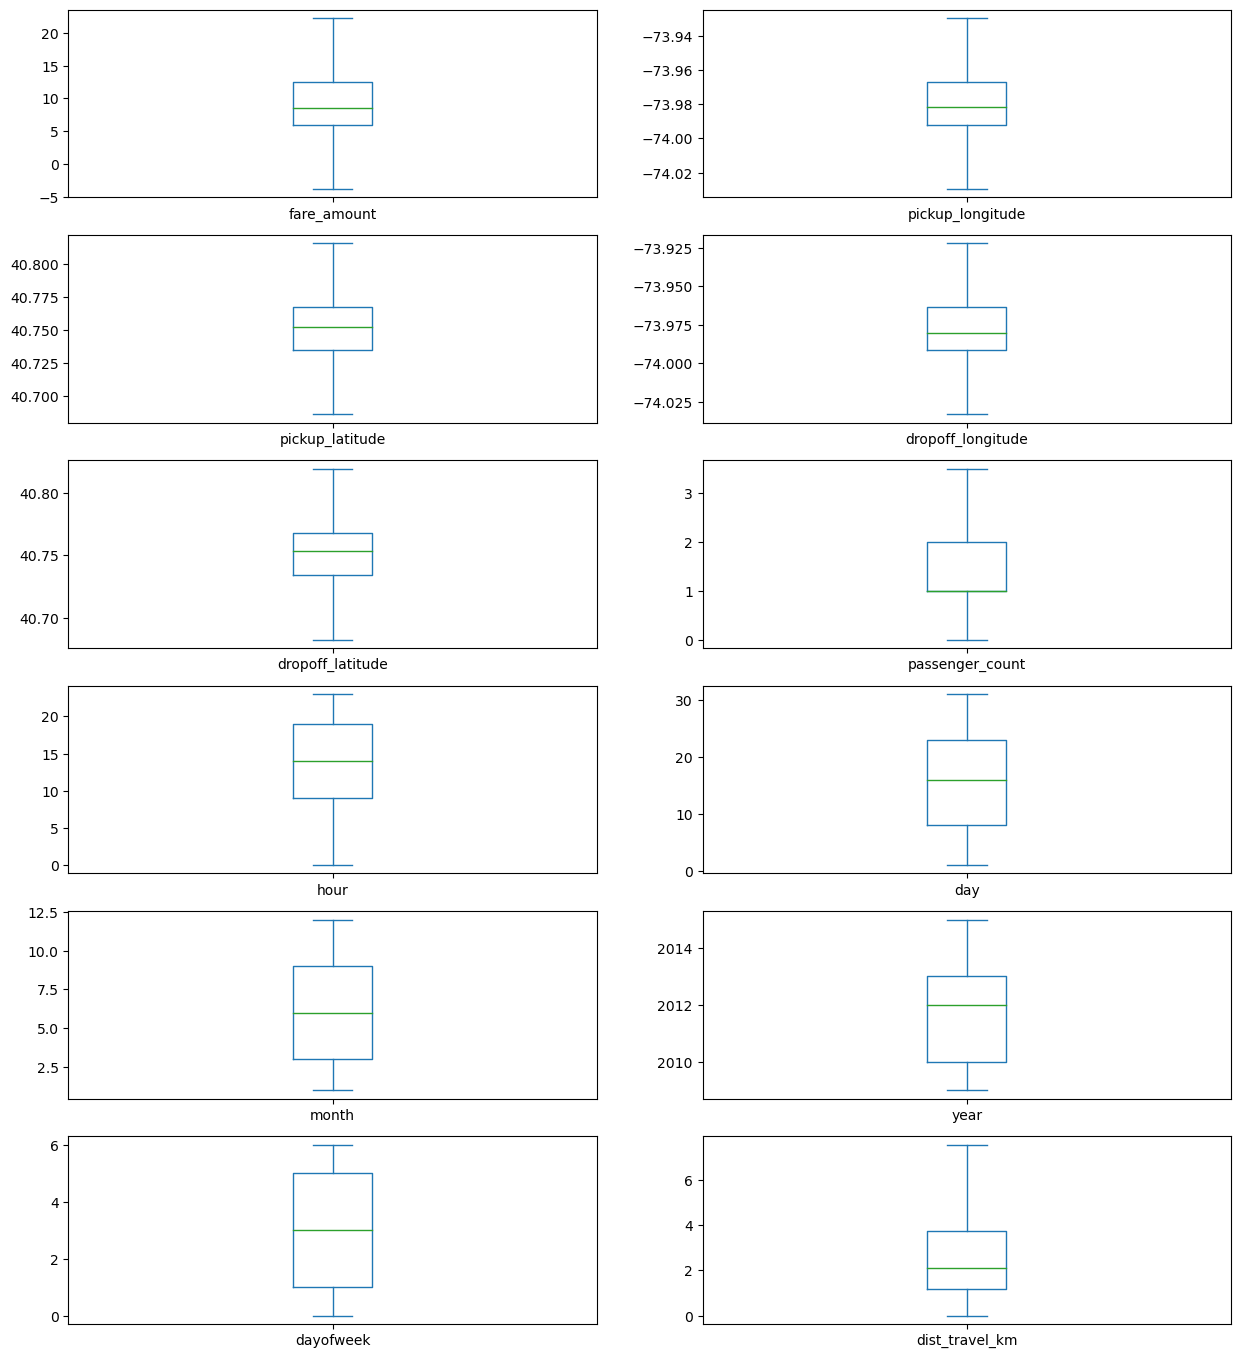

In [79]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [80]:
df = treat_outliers_all(df , df.iloc[: , 0::])

In [81]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [97]:
import haversine as hs  
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)

print(travel_dist)
df['dist_travel_km'] = travel_dist
df.head()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dist_travel_km       Axes(0.547727,0.222683;0.352273x0.0939024)
dtype: object

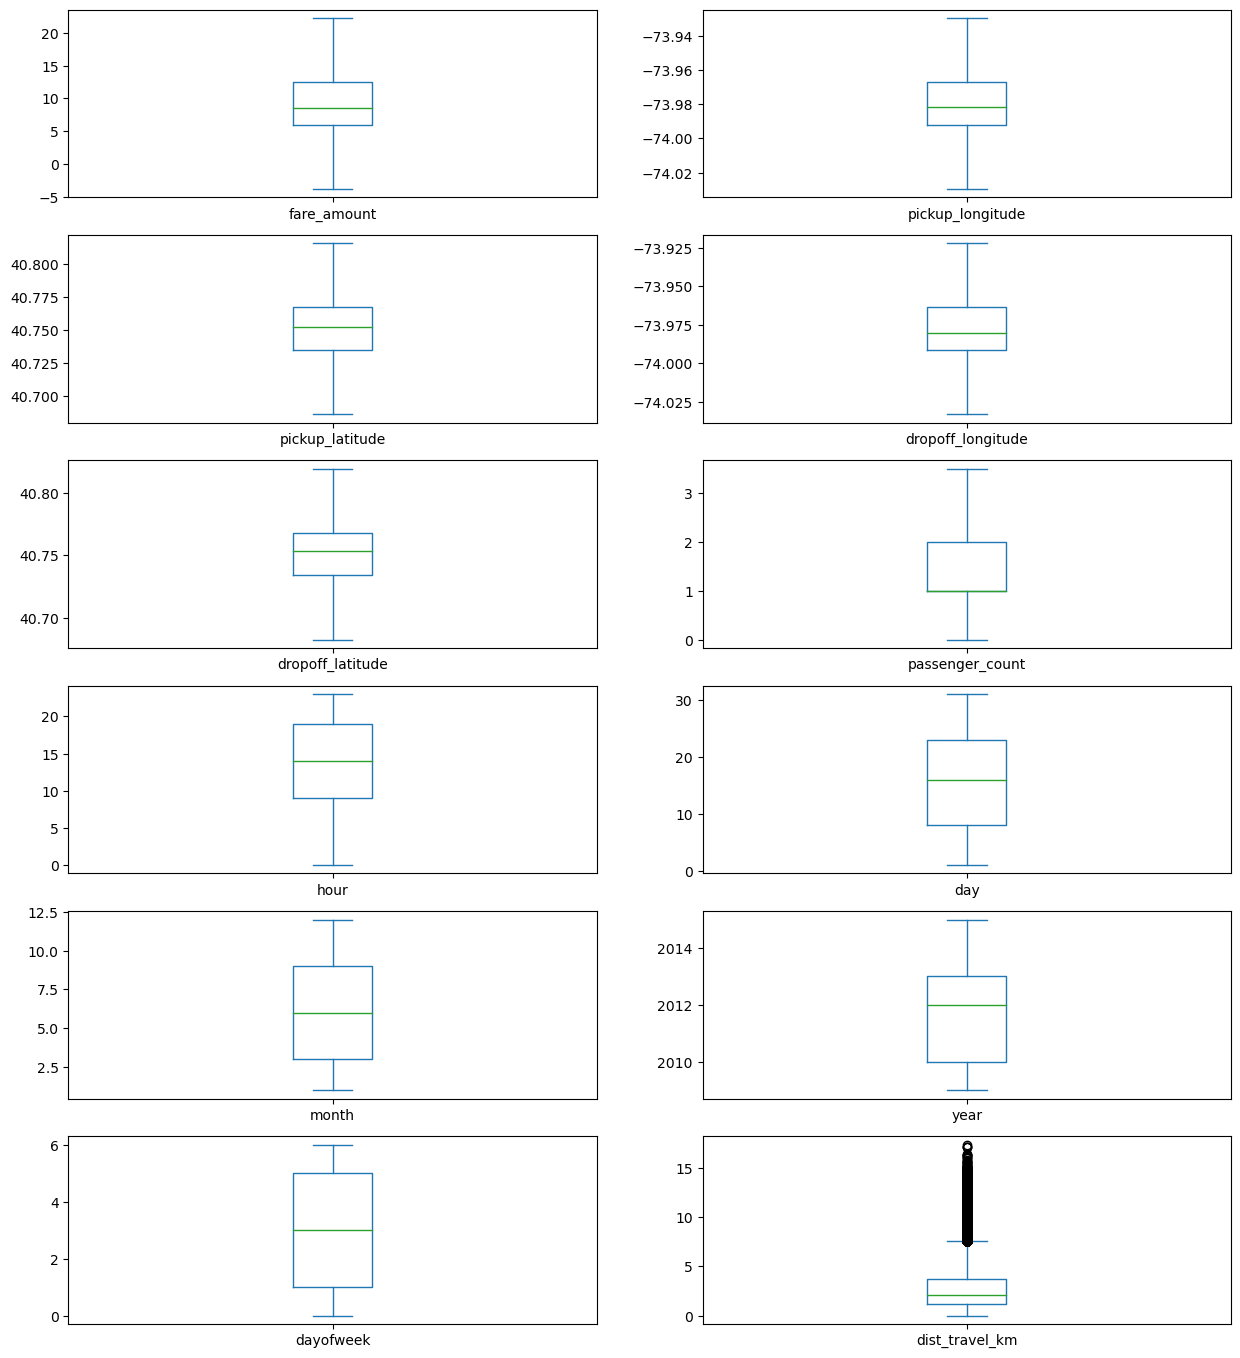

In [98]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [99]:
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


In [100]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [101]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [102]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [103]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<Axes: >

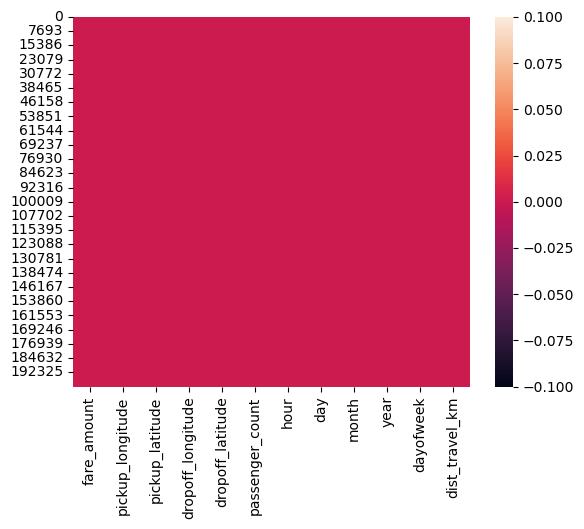

In [104]:
sns.heatmap(df.isnull()) 

In [105]:
corr = df.corr()

In [106]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786385
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048446
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073362
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.155191
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.052701
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009884
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035708
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001709
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010050
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022294


<Axes: >

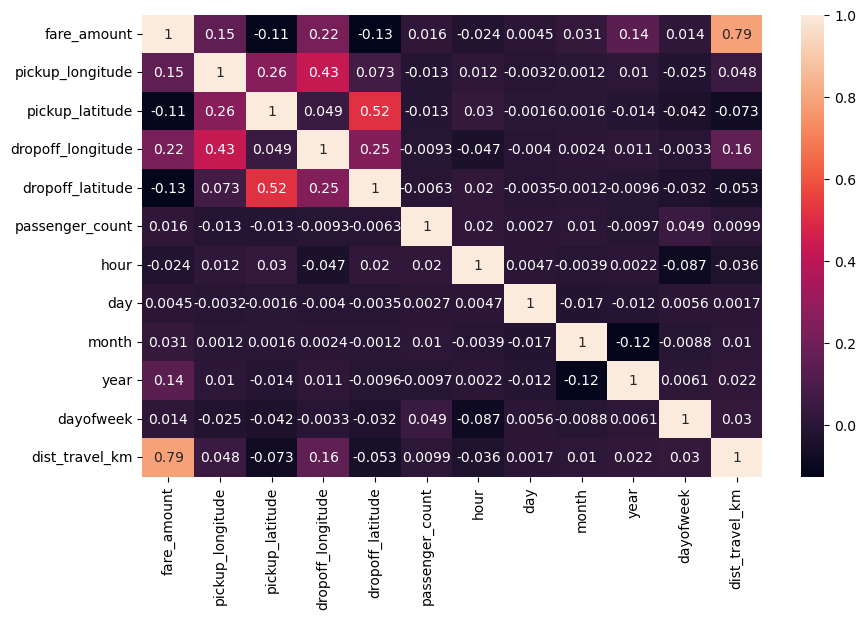

In [107]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

In [108]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [109]:
y = df['fare_amount']

In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

### Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [112]:
regression.fit(X_train,y_train)

LinearRegression()

In [113]:
regression.intercept_ 

3683.691563607333

In [114]:
regression.coef_ 

array([ 2.53332343e+01, -6.91416558e+00,  2.04602784e+01, -1.84909813e+01,
        7.03965398e-02,  7.45420236e-03,  2.80661766e-03,  5.80557118e-02,
        3.69661795e-01, -3.06565155e-02,  1.84535043e+00])

In [115]:
prediction = regression.predict(X_test)

In [116]:
print(prediction)

[ 7.23444924  8.15774638 15.38656215 ...  9.4345705  10.71375018
  8.46159857]


In [117]:
y_test

149371     4.90
14954     10.50
135317    22.25
130066    22.25
55152      7.30
          ...  
143845     4.90
187949    13.30
79482      9.70
76584     11.30
25961      9.70
Name: fare_amount, Length: 66000, dtype: float64

In [118]:
from sklearn.metrics import r2_score

In [119]:
r2_score(y_test,prediction)

0.6644483781236288

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
MSE = mean_squared_error(y_test,prediction)

In [122]:
MSE

9.893348513062962

In [123]:
RMSE = np.sqrt(MSE)

In [124]:
RMSE

3.1453693762518515

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

In [ ]:
R2_Random = r2_score(y_test,y_pred)

In [ ]:
R2_Random

In [ ]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [ ]:
MSE_Random

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random